In [12]:
import pandas as pd
from utility.data_preparation.prepare_time_series import prepare_time_series_data
from utility.ensemble.ensemble_forecast import ensemble_forecast
from utility.ensemble.plot_ensemble_forecast import plot_ensemble_forecast
from utility.prediction.ensemble_prediction import run_prediction_for_vehicle

from config import DATA_CSV_FILE

Time series analysis Plotly JSON saved at: /home/tjselevani/Desktop/Apps/vscode/python/python analysis/json/SM191/analysis/time_series_analysis.json

***** Features *******

date              datetime64[ns]
earnings                 float64
dayofweek                   int8
month                       int8
day                         int8
dayofyear                  int16
week                        int8
is_weekend                  int8
lag_1                    float32
lag_2                    float32
lag_3                    float32
lag_4                    float32
lag_5                    float32
lag_6                    float32
lag_7                    float32
rolling_mean_3           float32
rolling_mean_7           float32
rolling_std_7            float32
dtype: object

***** Features *******

ML Model Metrics: {'MAE': 760.6544444444445, 'RMSE': np.float64(1046.0689536598966), 'R2': 0.4620365860266503}
Plotly JSON saved at: json/SM191/forecast/ml_forecast.json
Plotly JSON saved at: j

19:21:55 - cmdstanpy - INFO - Chain [1] start processing


Plotly JSON saved at: json/SM191/forecast/sarima_forecast.json


19:21:57 - cmdstanpy - INFO - Chain [1] done processing


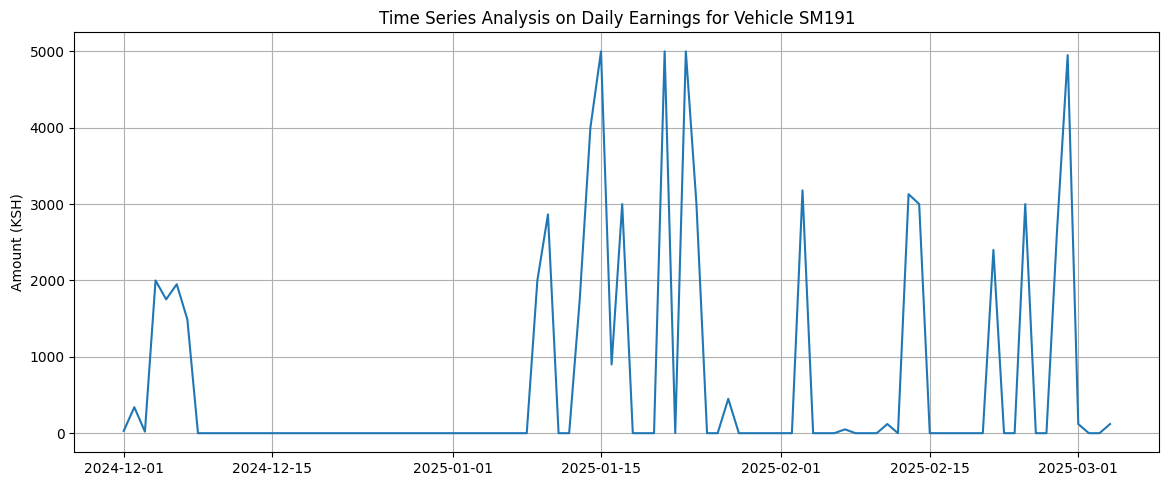

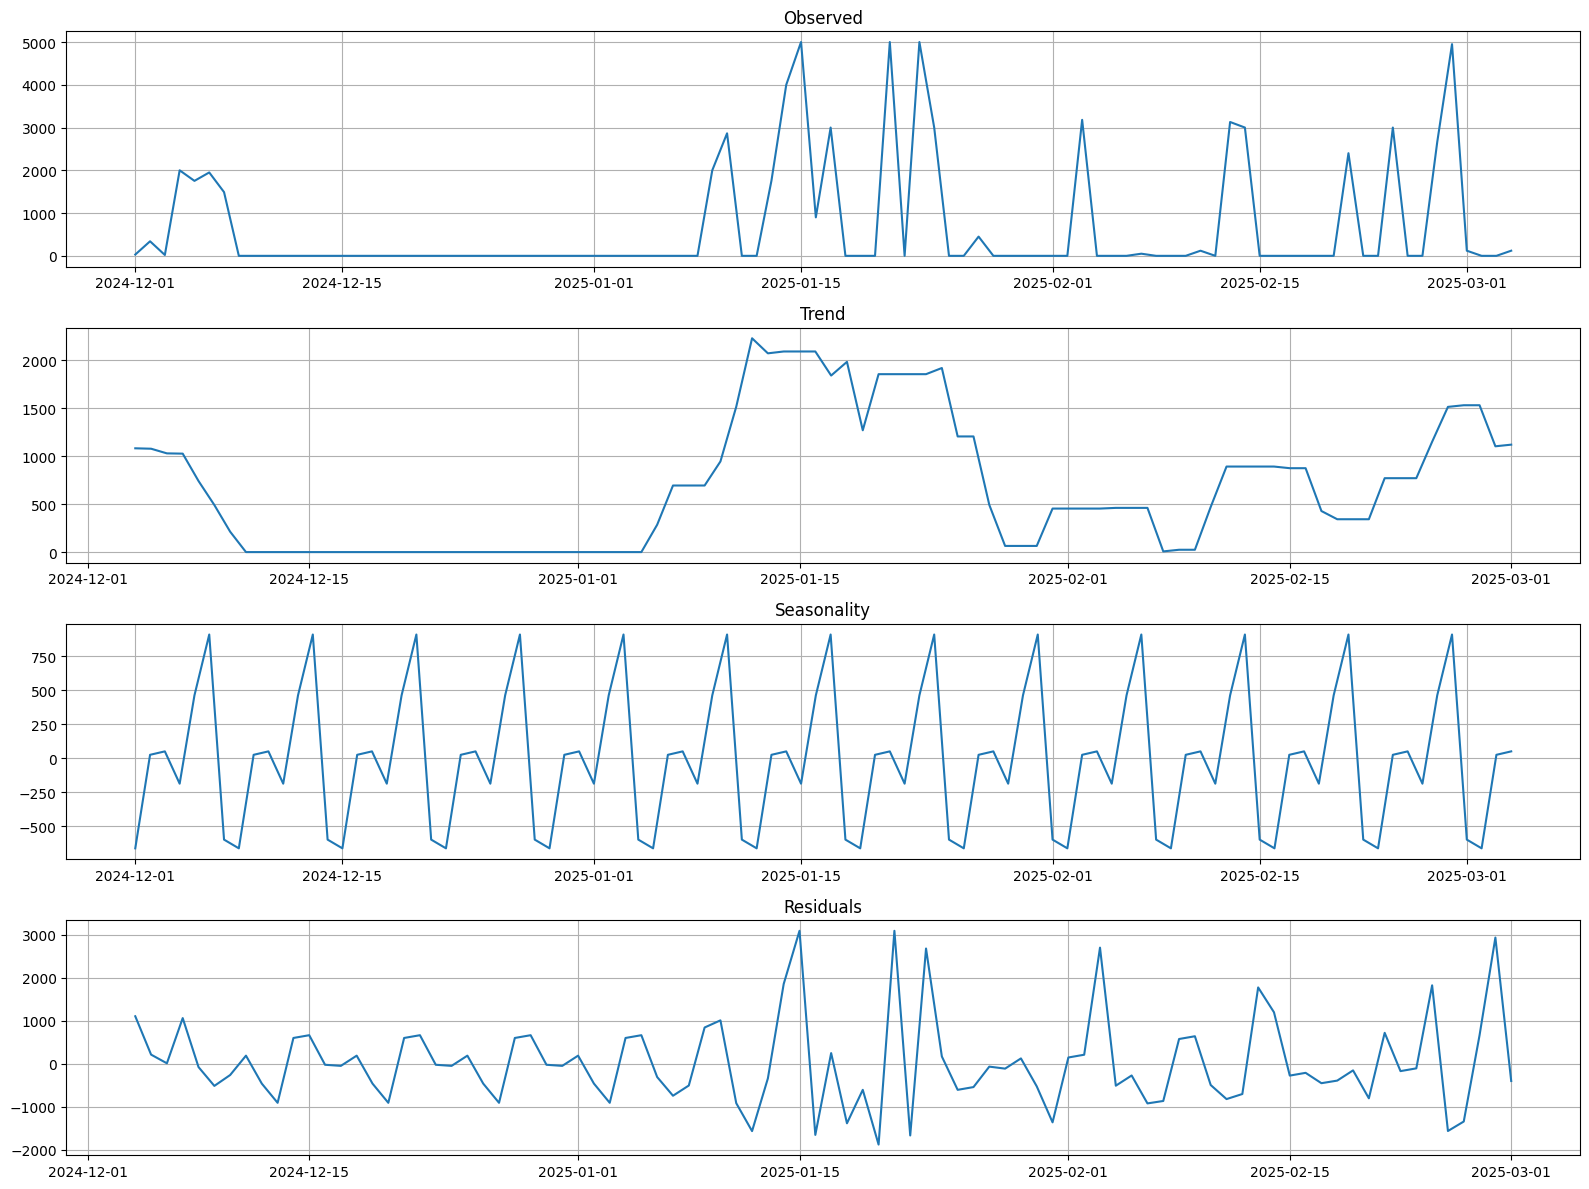

<Figure size 1600x1200 with 0 Axes>

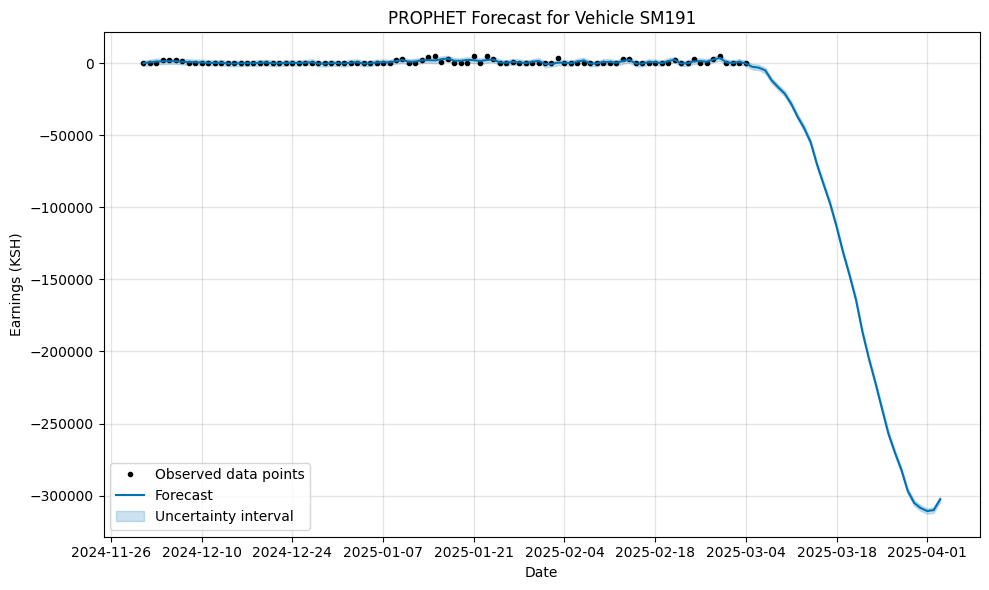

/home/tjselevani/Desktop/Apps/vscode/python/python analysis/utility/forecast/plot_forecast.py:133: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



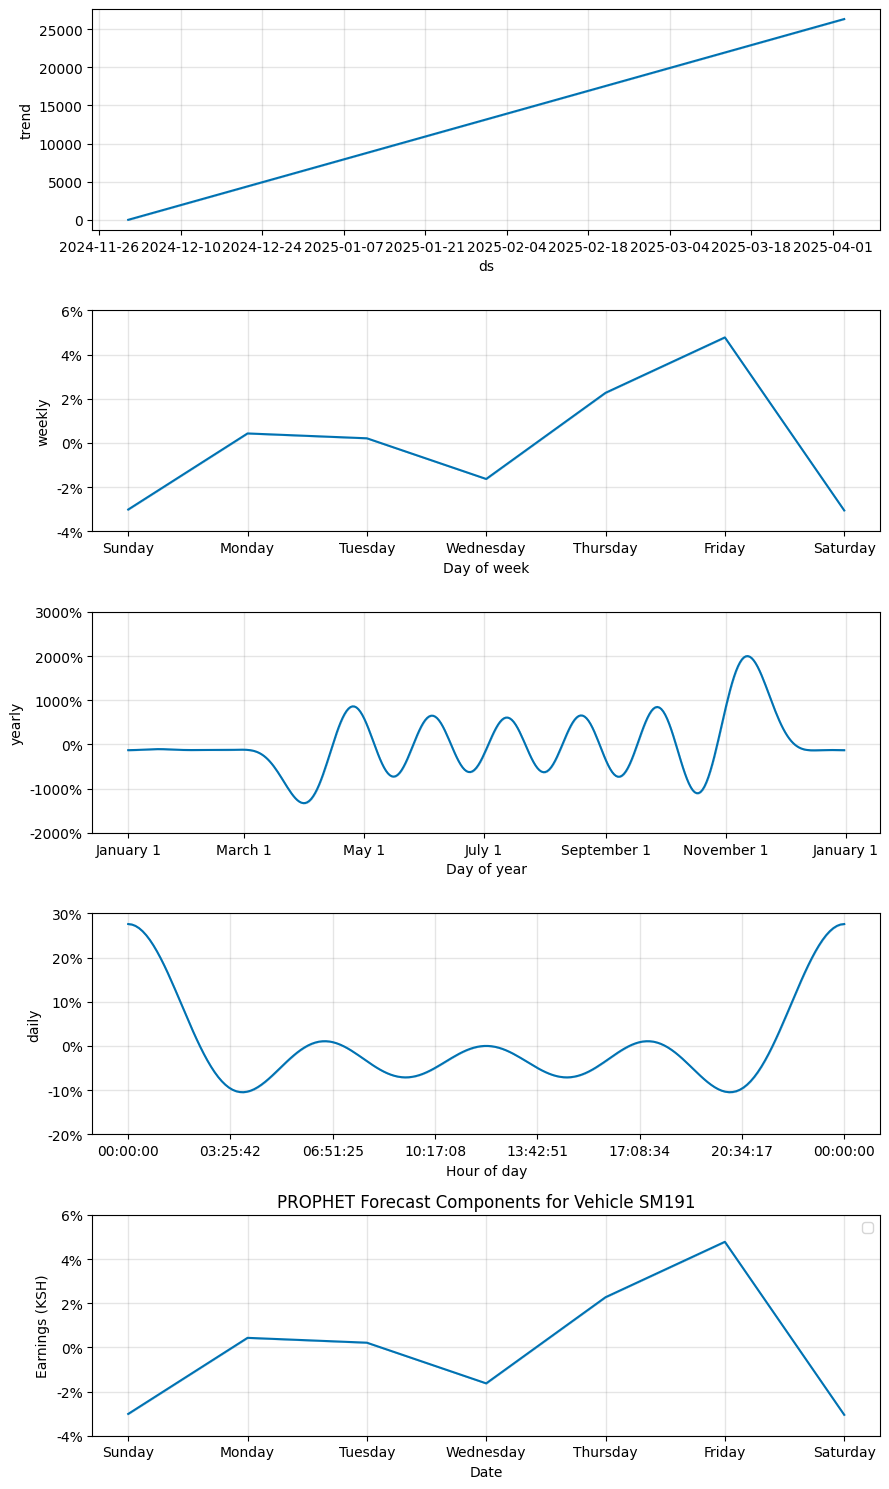

Forecast saved to /home/tjselevani/Desktop/Apps/vscode/python/python analysis/json/SM191/forecast/prophet_forecast.json
Forecast completed for vehicle SM191
Forecasted for 30 days into the future


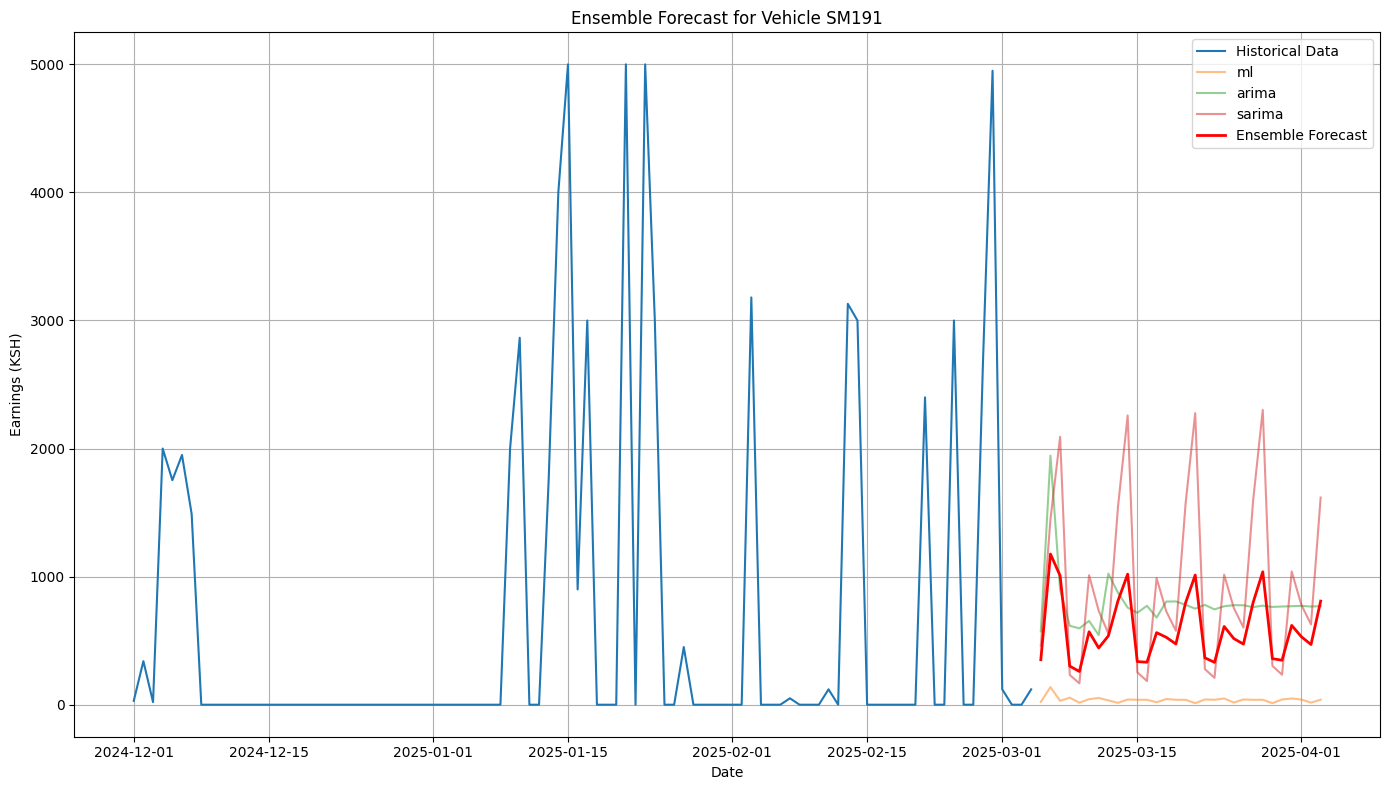

Ensemble Forecast for the next 7 days:
        date  ensemble_forecast
0 2025-03-05         351.278320
1 2025-03-06        1176.472778
2 2025-03-07        1006.960449
3 2025-03-08         301.086456
4 2025-03-09         259.470734
5 2025-03-10         569.505127
6 2025-03-11         443.087738
Total predicted earnings for next 7 days: 4107.86 KSH
Average daily earnings: 586.84 KSH


In [13]:
# Path to your data
data_path = DATA_CSV_FILE

# Vehicle to analyze
vehicle_id = "SM191"

# Run prediction for the vehicle
forecasts = run_prediction_for_vehicle(data_path, vehicle_id, forecast_days=30)

# Create ensemble forecast
ensemble_df = ensemble_forecast(forecasts)

# Plot ensemble forecast
ts_data = prepare_time_series_data(pd.read_csv(data_path), vehicle_id)
plot_ensemble_forecast(ts_data, ensemble_df, vehicle_id)

# Display the forecast for the next 7 days
print("Ensemble Forecast for the next 7 days:")
print(ensemble_df[["date", "ensemble_forecast"]].head(7))

# Calculate aggregate statistics
total_predicted = ensemble_df["ensemble_forecast"].head(7).sum()
average_daily = ensemble_df["ensemble_forecast"].head(7).mean()
print(f"Total predicted earnings for next 7 days: {total_predicted:.2f} KSH")
print(f"Average daily earnings: {average_daily:.2f} KSH")
